In [1]:
from tdc.single_pred import ADME
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from noiseestimator import NoiseEstimator
import math

In [2]:
# estimate noise from ref data
ref_full = pd.read_csv('../data/external/lipophilicity/ref_data_all.csv')
ref_clean = pd.read_csv('../data/external/lipophilicity/ref_data_remove_approx.csv')

In [3]:
# compute rmse 
def rmse(y_true, y_pred):
    return math.sqrt(np.mean((y_true - y_pred) ** 2))

def compute_std_dv(data):
    std_dv = 0
    n = 0
    for a, b in zip(data.Reference, data.Value):
        std_dv += (a - b)**2
        n += 1
    std_dv = math.sqrt(std_dv / (2 * (n - 1)))
    return std_dv

print('RMSE full dataset:', rmse(ref_full.Reference, ref_full.Value))
print('RMSE cleaned dataset:', rmse(ref_clean.Reference, ref_clean.Value))
print('STD DV full dataset:', compute_std_dv(ref_full))
print('STD DV cleaned dataset:', compute_std_dv(ref_clean))

RMSE full dataset: 0.46396512408114937
RMSE cleaned dataset: 0.21232345607586553
STD DV full dataset: 0.33579330377055294
STD DV cleaned dataset: 0.15505912850694517


In [4]:
data = ADME(name = 'Lipophilicity_AstraZeneca')
data.get_data()

Found local copy...
Loading...
Done!


,Drug_ID,Drug,Y
0,CHEMBL596271,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,3.54
1,CHEMBL1951080,COc1cc(OC)c(S(=O)(=O)N2c3ccccc3CCC2C)cc1NC(=O)...,-1.18
2,CHEMBL1771,COC(=O)[C@H](c1ccccc1Cl)N1CCc2sccc2C1,3.69
3,CHEMBL234951,O=C(NC1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2cc(Cl...,3.37
4,CHEMBL565079,Cc1cccc(C[C@H](NC(=O)c2cc(C(C)(C)C)nn2C)C(=O)N...,3.10
...,...,...,...
4195,CHEMBL496929,O=C(Nc1ccc(CCO)cc1)c1cc2cc(Cl)ccc2[nH]1,3.85
4196,CHEMBL199147,CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccc...,3.21
4197,CHEMBL15932,COc1cccc2[nH]ncc12,2.10
4198,CHEMBL558748,O=C(NCC1CCCCC1)c1c(Cl)ccc2ncccc12,2.65


In [5]:
data.y.to_csv('../data/processed/lipo.csv', index=False)

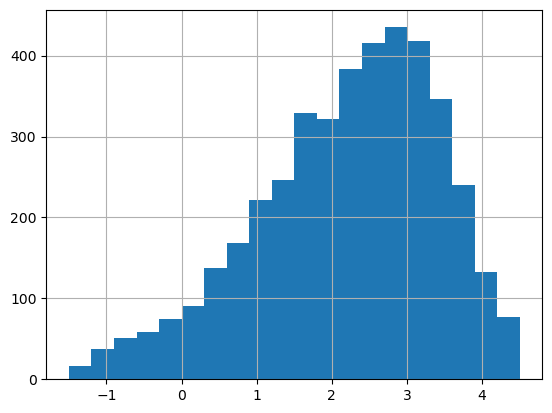

Range: 6.0


In [6]:
data.y.hist(bins=20)
plt.show()
range = data.y.max() - data.y.min()
print('Range:', range)

In [7]:
data.y.describe()

count    4200.000000
mean        2.186336
std         1.203004
min        -1.500000
25%         1.410000
50%         2.360000
75%         3.100000
max         4.500000
Name: Y, dtype: float64

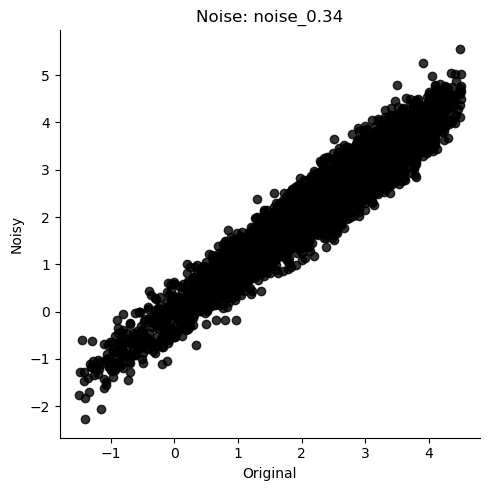

In [8]:
NE = NoiseEstimator(data.y, 0.34)
NE.plot()

<Axes: title={'center': 'mae for different noise levels'}, xlabel='Noise level', ylabel='mae'>

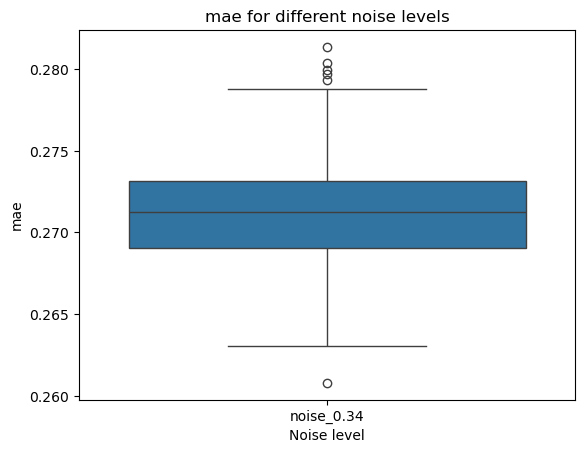

In [9]:
NE.plot_bootstrap(metric='mae')

In [10]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.34,0.271119,0.115517,0.339859,0.920161,0.962348


<Axes: title={'center': 'mae for different noise levels'}, xlabel='Noise level', ylabel='mae'>

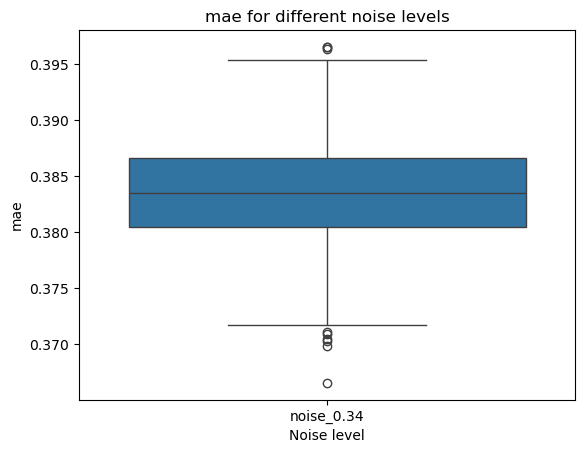

In [11]:
NE = NoiseEstimator(data.y, 0.34, 0.34)
NE.plot_bootstrap(metric='mae')

In [12]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.34,0.383459,0.231026,0.480621,0.852146,0.926112


In [13]:
NE.noise_bootstraps.mae.to_csv('../data/interim/Lipophilicity_mae.csv')